# Kaggle房价预测



>步骤:

>一.导入数据包与数据集

>二.数据分析
1. 总体预览:了解每列数据的含义,数据的格式等
2. 数据初步分析,使用统计学与绘图:初步了解数据之间的相关性,为构造特征工程以及模型建立做准备
>
三.特征工程
1. 根据业务,常识,以及第二步的数据分析构造特征工程.
2. 将特征转换为模型可以辨别的类型(如处理缺失值,处理文本进行等)
>
四.模型选择
1. 根据目标函数确定学习类型,是无监督学习还是监督学习,是分类问题还是回归问题等.
2. 比较各个模型的分数,然后取效果较好的模型作为基础模型.
>
五.修改特征和模型参数
1. 可以通过添加或者修改特征,提高模型的上限.
2. 通过修改模型的参数,是模型逼近上限
>
>
><a href=https://github.com/fengfengtzp>@风风</a>

## 一、导入数据包与数据集

In [22]:
#导入EDA使用的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#导入数据集
train = pd.read_csv('train.csv',index_col='Id')#训练集
test = pd.read_csv('test.csv',index_col='Id')#需要预测数据集
#查看数据集形状
print(train.shape,test.shape)

(1460, 80) (1459, 79)


## 二、数据分析

### 总体预览

对数据集有什么feature和feature分布有一个大致的了解

In [2]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


从上面的数据集包含79个特征，特征中包含数值变量和分类变量，并且数据中有缺失值

### 理解数据集
通过创建一个Excel表格来管理特征，对每个特征进行多维度的描述，更好的理解特征。表格应包括：
+ 变量名：变量名称
+ 变量类型：此列应只有两种可能的值“数值”“分类”。“数值”意味着数值型变量，如“LotArea”，“分类”意味着类别的变量,如“LotConfig”
+ 方面：特征是属于哪个方面。如房子的空间、房子的地理位置...对特征本身的抽象，将特征归为某一方面
+ 期望：主观上对于特征重要性（对预测目标的影响）的预期
+ 结论：经过分析后，客观上对预测目标的影响
+ 其他

虽然对特征的主观不太准确，但通过完善该列，增强了对数据的理解，需要对每个特征进行一次评估，评估从以下三个方面展开：
+ 自己买房子时是否会考虑这个变量？（如墙面的瓷砖类型是否影响你做出购买决定）
+ 如果会考虑，影响力有多大？(墙面使用普通材质和高级材质影响有多大）
+ 这些信息是否在其他变量中描述过（例如，如果'LandContour'给出了房产的平整度，我们是否真的需要知道'LandSlope'？）

通过以上分析后，将实际相关性填入结论列


In [36]:
featureExp = pd.read_excel('./HousePriceFeature.xlsx')#读取根据上述操作填写的Excel表格
featureExp.head()

,Name,Description,DataType,Linear?,Segment,Expectation,Conclusion,Other
0,Id,条目名称不参与分析,NaN,NaN,NaN,NaN,NaN,NaN
1,MSSubClass,标识出售中涉及的住宅的类型。,数值,否,房型,中,NaN,实际是一个分类变量
2,MSZoning,住宅地理位置,分类,否,房屋位置,中,NaN,NaN
3,LotFrontage,与房屋相连的街道英尺,数值,是,房屋位置,低,NaN,NaN
4,LotArea,土地面积，英尺,数值,是,房屋属性,高,NaN,NaN


### 观察目标值‘SalePrice’
SalePrice数据分布：
+ 是否符合正态分布
+ 异常值
+ 与其他特征的关系

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

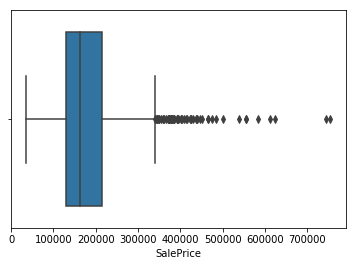

In [37]:
target = train['SalePrice'].copy()#通过使用copy函数幅值一个Series而不是Series的引用
sns.boxplot(target)
target.describe()


偏度: 1.882876
峰度: 6.536282


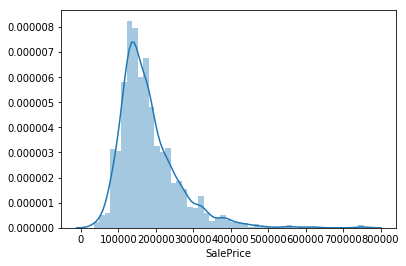

In [38]:
sns.distplot(target)
#skewness and kurtosis
print("偏度: %f" % target.skew())#表征概率分布密度曲线相对于平均值不对称程度的特征数。直观看来就是密度函数曲线尾部的相对长度
print("峰度: %f" % target.kurt())#正太分布峰度为3，此处具有过度的峰度

图表跟具体的数值对照可以得出大部分房屋分布在12~21w之间，而70w以上的房子看起来有点像异常值，留待后续进一步观察

其次
+ 偏离正态分布。
+ 有明显的正偏态。
+ 峰度较大。

**待补充峰度和偏度的意义**

In [40]:
train[train['SalePrice']>600000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## 三、特征工程

在开始后续的特征探索工作之前，我们先**将训练数据集和测试数据集合并**。

In [90]:
data = pd.concat([train.drop('SalePrice',1),test])
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 四、模型选择

In [348]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
#transform和fit_transform的结果是完全一样的，但是需要先fit得到模型的各种参数，因此先在训练集调用fit_transform
imputed_X_train = my_imputer.fit_transform(Numericdata[:1460])
imputed_X_test = my_imputer.transform(Numericdata[1460:])
y_train =target

In [349]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(imputed_X_train,y_train, test_size=0.20)

In [350]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [351]:
Pval_y = my_model.predict(val_X)

In [352]:
mean_absolute_error(Pval_y,val_y)

16581.140946061645

In [353]:
s1=my_model.score(val_X,val_y)

In [354]:
y_test1 = my_model.predict(imputed_X_test)
subdata = pd.DataFrame({'Id':test.index,'SalePrice':y_test})
subdata.to_csv('submission.csv', index=False)

In [355]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_model, train_X, train_y, scoring='neg_mean_absolute_error')
print(scores)

[-17674.53941306 -16401.04417376 -17058.56332343]


In [356]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


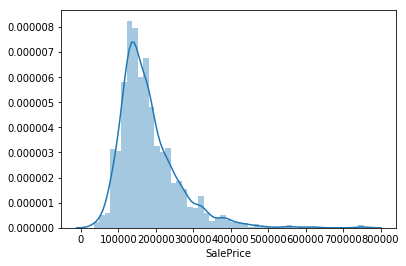

In [357]:
import seaborn as sns
sns.distplot(target)

In [358]:
target[target>500000]

Id
179     501837
441     555000
692     755000
770     538000
804     582933
899     611657
1047    556581
1170    625000
1183    745000
Name: SalePrice, dtype: int64

In [359]:
from sklearn import linear_model
reg = linear_model.ElasticNetCV(l1_ratio=0.9,alphas=[0.1,0.3,0.5,1,10],max_iter=1000,cv=10)
reg.fit(train_X, train_y)

C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=[0.1, 0.3, 0.5, 1, 10], copy_X=True, cv=10, eps=0.001,
       fit_intercept=True, l1_ratio=0.9, max_iter=1000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [360]:
Pval_y = reg.predict(val_X)
mean_absolute_error(Pval_y,val_y)

18632.125993877413

In [361]:
reg.l1_ratio_

0.90000000000000002

In [362]:
reg.alpha_

0.10000000000000001

In [363]:
s2=reg.score(val_X,val_y)
y_test2 = reg.predict(imputed_X_test)

In [364]:
reg = linear_model.LassoCV(alphas=[1,10,20,50,100,200,500],max_iter=1000,cv=5)
reg.fit(train_X, train_y)
Pval_y = reg.predict(val_X)
mean_absolute_error(Pval_y,val_y)

C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


17579.964845484723

In [365]:
s3=reg.score(val_X,val_y)
y_test3 = reg.predict(imputed_X_test)

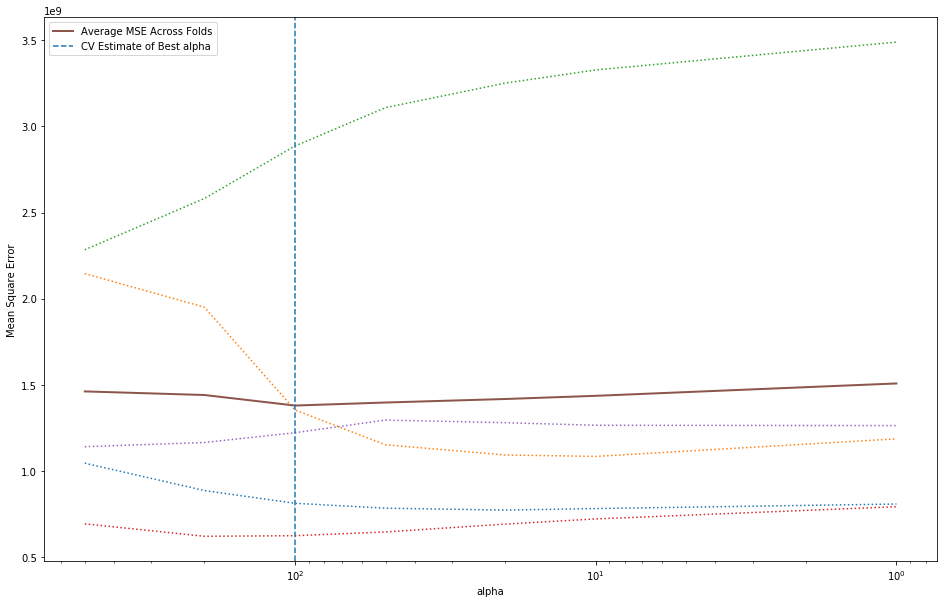

In [366]:
plt.figure(figsize=(16,10))
##随着alpha值的变化，均方误差的变化曲线
plt.plot(reg.alphas_, reg.mse_path_, ':')
##验证过程中，随着alpha值的变化，均方误差的平均曲线
plt.plot(reg.alphas_, reg.mse_path_.mean(axis=-1),
         label='Average MSE Across Folds', linewidth=2)
##每次验证系统认为的最合适的alpha值
plt.axvline(reg.alpha_, linestyle='--',
            label='CV Estimate of Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
plt.axis('tight')
plt.show()

In [367]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [368]:
Pval_y = reg.predict(val_X)
mean_absolute_error(Pval_y,val_y)

19522.420890410962

In [369]:
y_test4 = reg.predict(imputed_X_test)
s4=reg.score(val_X,val_y)

In [370]:
sum_s = s1+s2+s3+s4
y_out = y_test1*s1/sum_s+y_test2*s2/sum_s+y_test3*s3/sum_s+y_test4*s4/sum_s

In [371]:
subdata = pd.DataFrame({'Id':test.index,'SalePrice':y_out})
subdata.to_csv('submission.csv', index=False)